In [1]:
from corespray import corespraydf,load_galpy_potential
from galpy.potential import MWPotential2014
from galpy.util import conversion
from galpy.orbit import Orbit
import numpy as np
import matplotlib.pyplot as plt
import time
import clustertools as cts

In [2]:
gcname='M3'
mu0 = 0.
sig0 = 7.6
vesc0 = 30.0
logrho0 = 3.67
rho0 = 10.0**3.67
mgc = 4.06e5
rgc = 0.15903
rcore = 1.23
W0 = 8.61469762517307
mmin = 0.1
mmax = 1.4
alpha = -1.35
Porb = 0.38782091641000876*1000

In [3]:
#Load a custom array of stellar masses to be used
#for the mass function
data=np.loadtxt('imf.txt',skiprows=1)
masses=data[:,0]

In [4]:
mwpot = load_galpy_potential(bar=False,dw_arm=False,trans_arm=False)


In [5]:
cspray = corespraydf(gcname, mwpot, mgc, rgc, W0,)

### Sample locations of single star and binary between 0
### and mean separation in core
### Relative distances will be between twice the hard-soft boundary and 2 x meanseparation

In [30]:
#Pass rsample=True to sample separation
#to change number of mean sepearations to sample from, pass nrsep=X
os, ob = cspray.sample_three_body(Porb, nstar=1000, binaries=True, mu0=mu0, sig0=sig0, vesc0=vesc0, rho0=rho0,m1=1.0,m2a=1.0,m2b=1.0,verbose=False,timing=False,method='dopr54_c',rsample=True,nrsep=2)

In [31]:
dr=cspray.dr
vesc=cspray.vesc
e0=cspray.e0

In [32]:
np.amin(dr),np.amax(dr),cspray.rsep

(0.00053593906058379442, 0.048518688337064977, 0.027471314942999096)

Text(0.5, 0, 'dr')

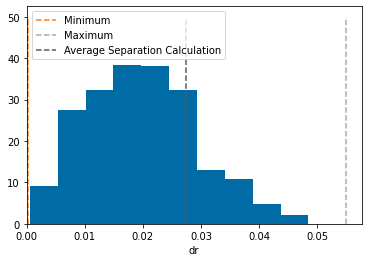

In [38]:
n,bins,patches=plt.hist(dr,density=True)
plt.plot([2.*a_max,2.0*a_max],[0,50],'--',label='Minimum')
plt.plot([2*cspray.rsep,2*cspray.rsep],[0,50],'--',label='Maximum')
plt.plot([cspray.rsep,cspray.rsep],[0,50],'--',label='Average Separation Calculation')
plt.xlim(0,2.1*cspray.rsep)
plt.legend(loc=2)
plt.xlabel('dr')

### Extract parameters for the SINGLE escapers:

In [39]:
t_esc = cspray.tesc  # [Myr] in the past that star escaped
v_esc = cspray.vesc  # [km/s] kick velocity that star received
mstar = cspray.mstar # [Msol] mass of kicked star

In [40]:
# Would tesc of binary be same as escaper star?
v_esc_b = cspray.vescb  # [km/s] kick velocity that star received
m_b1 = cspray.mb1  # [Msol] mass of primary star
m_b2 = cspray.mb2  # [Msol] mass of secondary star
m_b_tot = m_b1 + m_b2  # [Msol]

# bindx is a boolean that gives indxs of binaries that escaped the cluster: 
bin_esc = cspray.bindx
print("{}/{} binaries escaped {}.".format(len(ob[bin_esc]), len(ob), gcname))

137/1000 binaries escaped M3.


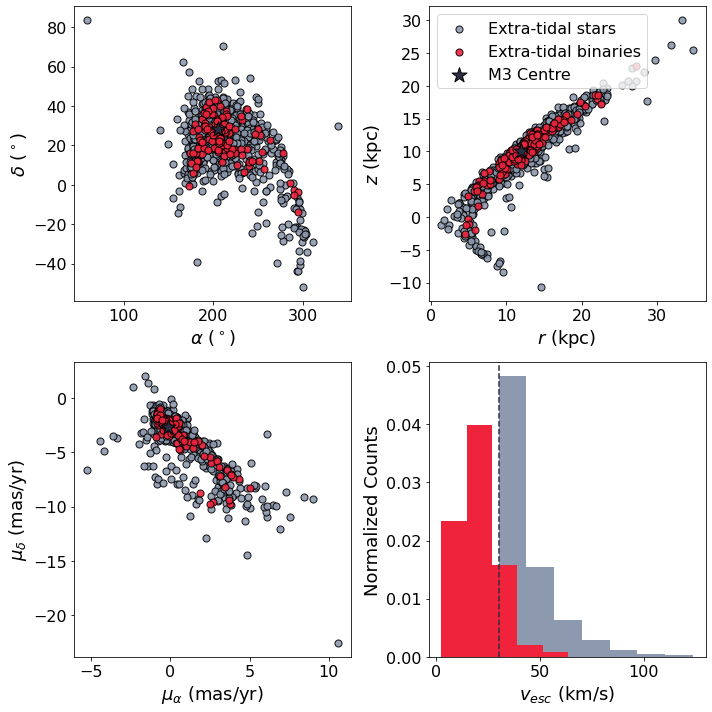

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# RA vs Dec positions:
ax[0, 0].scatter(os.ra(), os.dec(), marker='o', s=50, edgecolor='black', c='#8d99ae', alpha=0.9) 
ax[0, 0].scatter(ob.ra()[bin_esc], ob.dec()[bin_esc], marker='o', s=50, edgecolor='black', c='#ef233c', alpha=0.9) 
ax[0, 0].scatter(cspray.o.ra(), cspray.o.dec(), marker='*', s=250, edgecolor='black', c='#2b2d42')
ax[0, 0].set_xlabel(r"$\alpha$ ($^\circ $)", fontsize=18)
ax[0, 0].set_ylabel(r"$\delta$ ($^\circ $)", fontsize=18)
ax[0, 0].tick_params(axis='both', which='major', labelsize=16)
ax[0, 0].tick_params(axis='both', which='minor', labelsize=16)

# R vs z positions:
ax[0, 1].scatter(os.r(), os.z(), marker='o', s=50, edgecolor='black', c='#8d99ae', alpha=0.9, label='Extra-tidal stars') 
ax[0, 1].scatter(ob.r()[bin_esc], ob.z()[bin_esc], marker='o', s=50, edgecolor='black', c='#ef233c', alpha=0.9, label='Extra-tidal binaries') 
ax[0, 1].scatter(cspray.o.r(), cspray.o.z(), marker='*', s=250, edgecolor='black', c='#2b2d42', label='M3 Centre')
ax[0, 1].set_xlabel(r"$r$ (kpc)", fontsize=18)
ax[0, 1].set_ylabel(r"$z$ (kpc)", fontsize=18)
ax[0, 1].tick_params(axis='both', which='major', labelsize=16)
ax[0, 1].tick_params(axis='both', which='minor', labelsize=16)
ax[0, 1].legend(fontsize=16)

# Proper motion:
ax[1, 0].scatter(os.pmra(), os.pmdec(), marker='o', s=50, edgecolor='black', c='#8d99ae', alpha=0.9) 
ax[1, 0].scatter(ob.pmra()[bin_esc], ob.pmdec()[bin_esc], marker='o', s=50, edgecolor='black', c='#ef233c', alpha=0.9) 
ax[1, 0].scatter(cspray.o.pmra(), cspray.o.pmdec(), marker='*', s=250, edgecolor='black', c='#2b2d42')
ax[1, 0].set_xlabel(r"$\mu_{\alpha}$ (mas/yr)", fontsize=18)
ax[1, 0].set_ylabel(r"$\mu_{\delta}$ (mas/yr)", fontsize=18)
ax[1, 0].tick_params(axis='both', which='major', labelsize=16)
ax[1, 0].tick_params(axis='both', which='minor', labelsize=16)

# Escape velocities:
ax[1, 1].hist(v_esc, bins=7, color='#8d99ae', density=True)
ax[1, 1].hist(v_esc_b, bins=5, color='#ef233c', density=True)
ax[1, 1].axvline(vesc0, ls='--', c='#2b2d42')
ax[1, 1].tick_params(axis='both', which='major', labelsize=16)
ax[1, 1].tick_params(axis='both', which='minor', labelsize=16)
ax[1, 1].set_xlabel(r"$v_{esc}$ (km/s)", fontsize=18)
ax[1, 1].set_ylabel("Normalized Counts", fontsize=18)

fig.tight_layout()
plt.show()